In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('concrete_data.csv')

In [3]:
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PowerTransformer

In [4]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [7]:
x = df.drop('Strength', axis=1)
y = df['Strength']

In [9]:
x

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .25, random_state = 41)

In [15]:
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

r2_score(y_test, y_pred)

0.5309015726569184

In [20]:
lr = LinearRegression()
np.mean(cross_val_score(lr, x, y, scoring='r2', cv=10))

np.float64(0.27820729160873814)

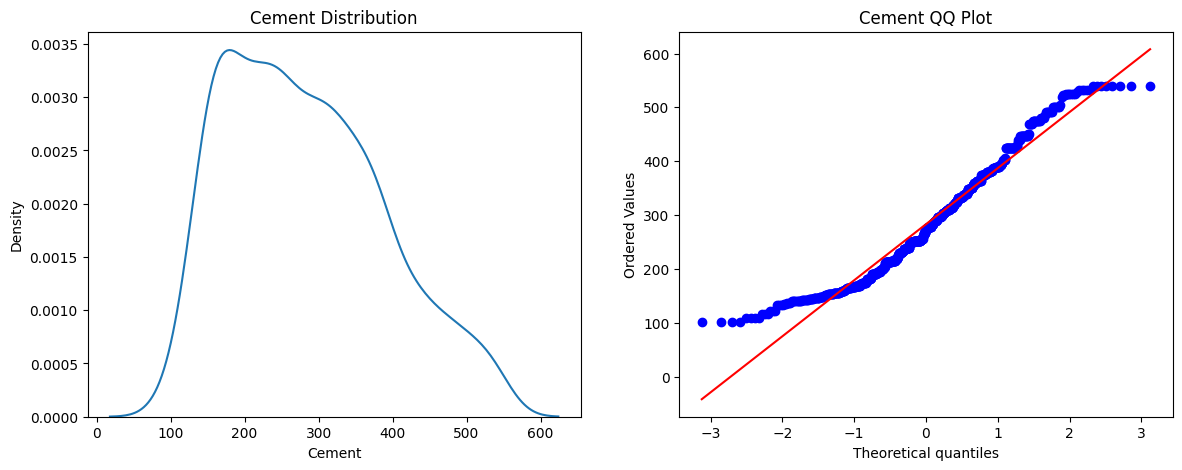

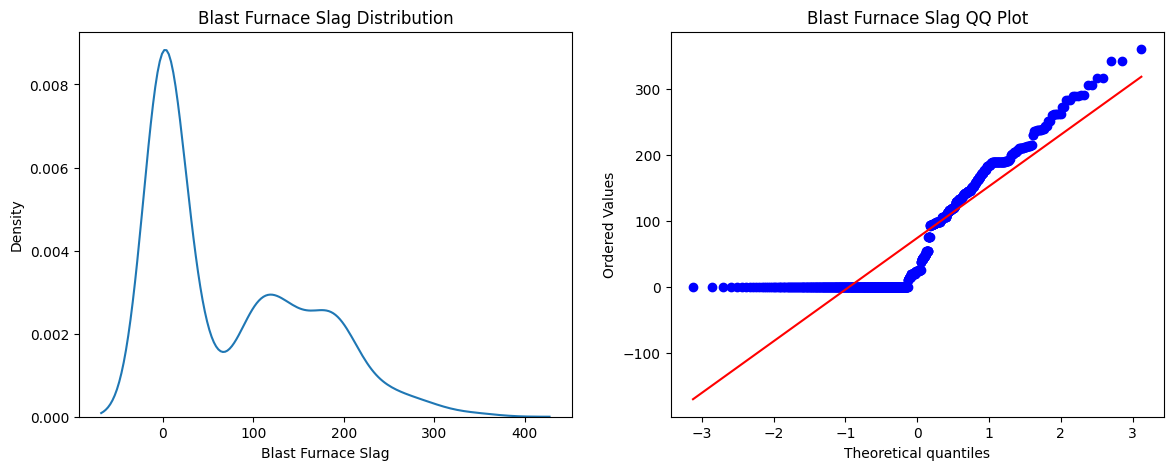

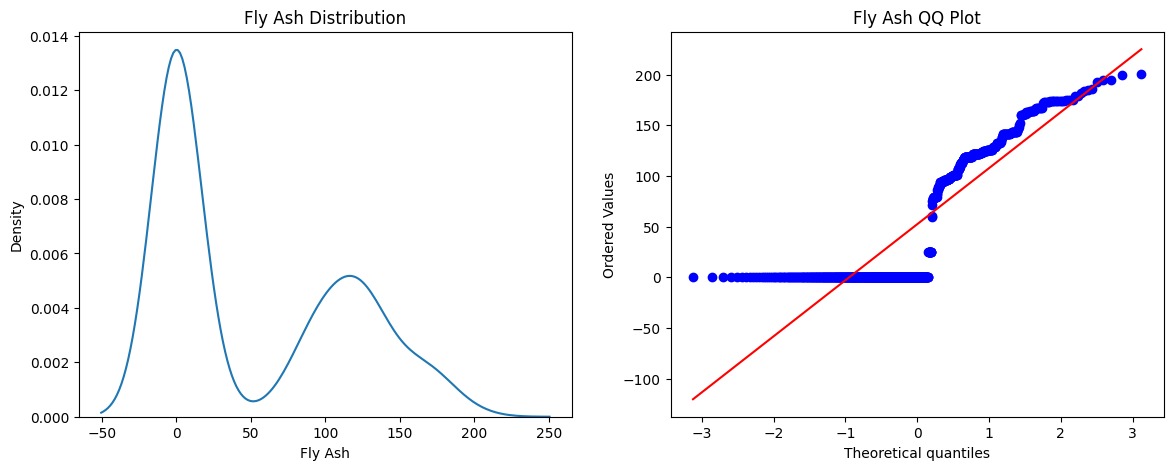

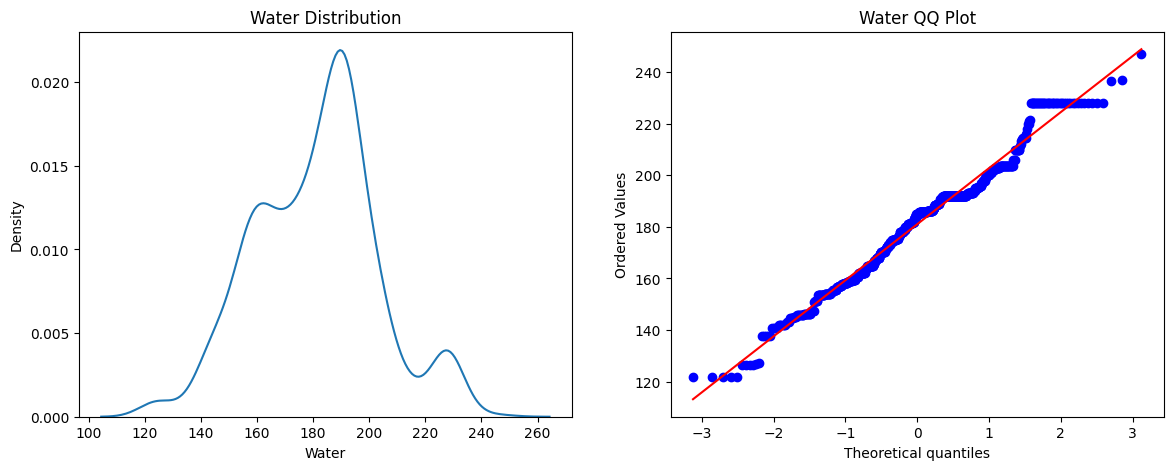

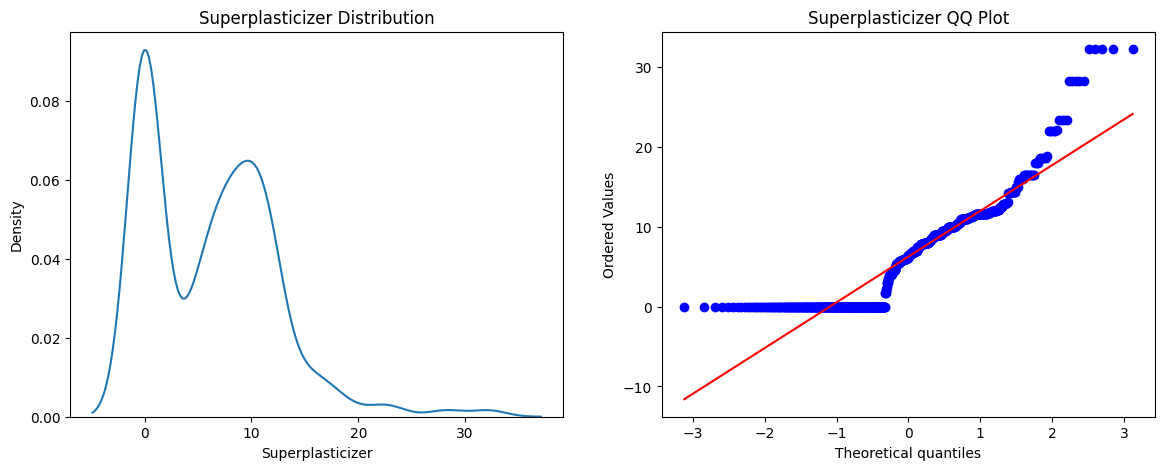

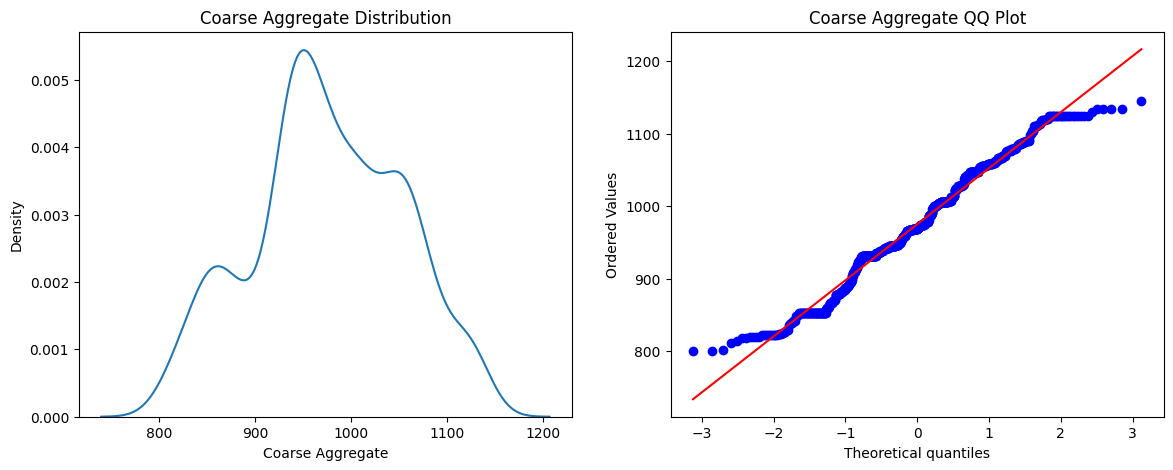

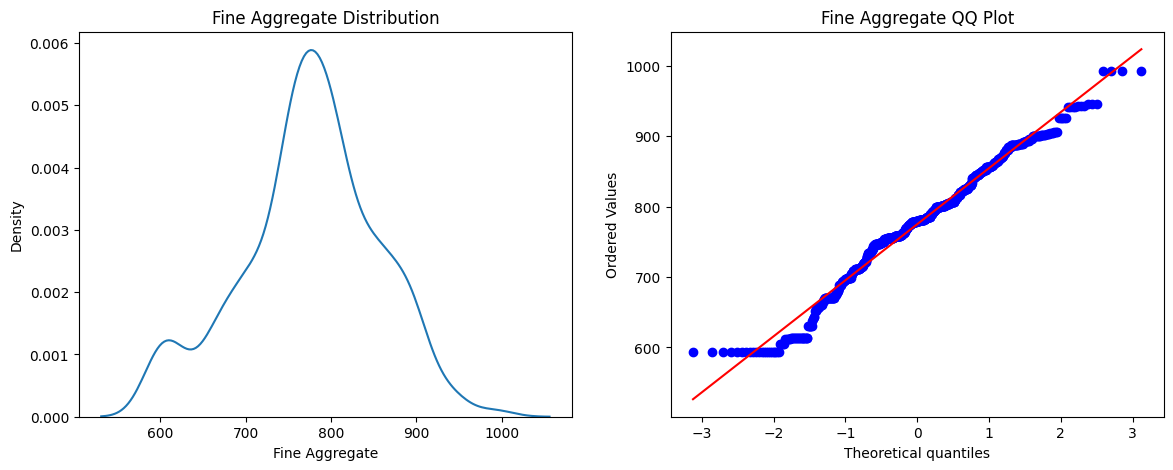

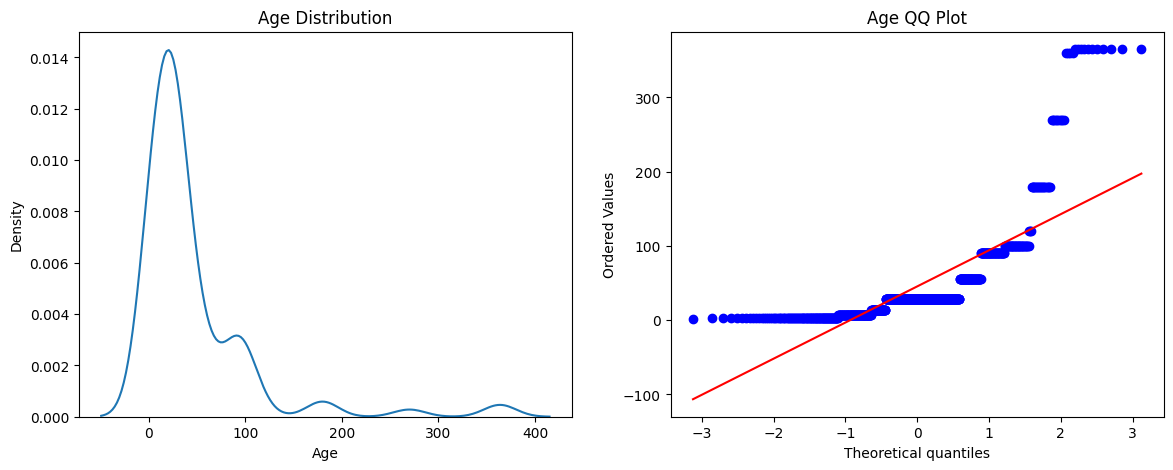

In [27]:
for col in x_train.columns:
    plt.figure(figsize=(14, 5))
    plt.subplot(121)

    sns.kdeplot(x_train[col])
    plt.title(f'{col} Distribution')

    plt.subplot(122)
    stats.probplot(x_train[col], dist='norm', plot=plt)
    plt.title(f'{col} QQ Plot')

    plt.show()

In [28]:
# applying box-cox transform
pt = PowerTransformer()
x_train_trnf = pt.fit_transform(x_train + 0.000000001)
x_test_trnf = pt.transform(x_test + 0.000000001)

pd.DataFrame({'cols' : x_train.columns, 'box-cox_lambdas' : pt.lambdas_})

,cols,box-cox_lambdas
0,Cement,0.190015
1,Blast Furnace Slag,0.031295
2,Fly Ash,-0.166546
3,Water,0.886986
4,Superplasticizer,0.239519
5,Coarse Aggregate,1.234880
6,Fine Aggregate,1.766573
7,Age,-0.003614


In [29]:
lr = LinearRegression()
lr.fit(x_train_trnf, y_train)

y_pred = lr.predict(x_test_trnf)

r2_score(y_test, y_pred)

0.7659586862434764

In [30]:
pt = PowerTransformer(method = 'box-cox')
x_trnf = pt.fit_transform(x + 0.000000001)

lr = LinearRegression()
np.mean(cross_val_score(lr, x_trnf, y, scoring='r2', cv=10))


np.float64(0.6452833319859103)

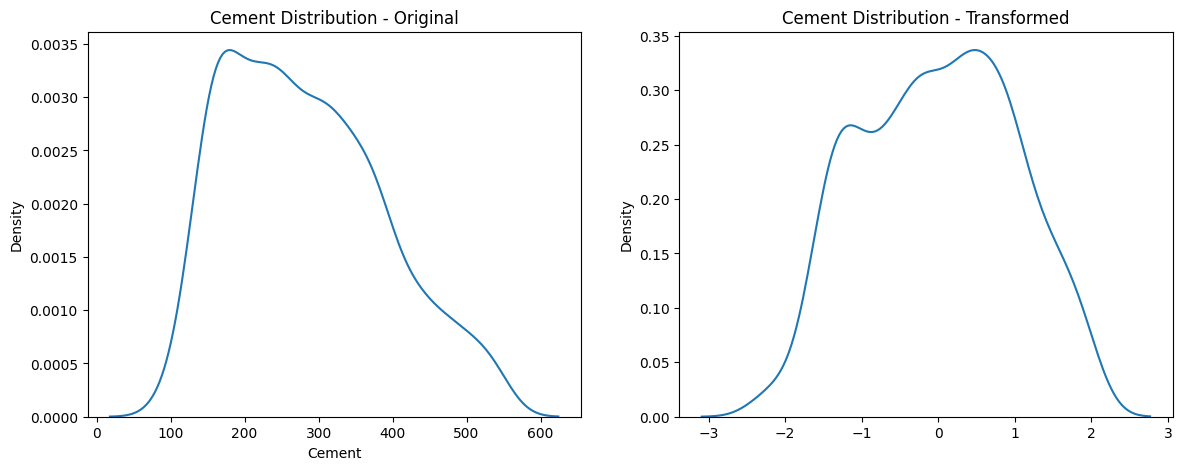

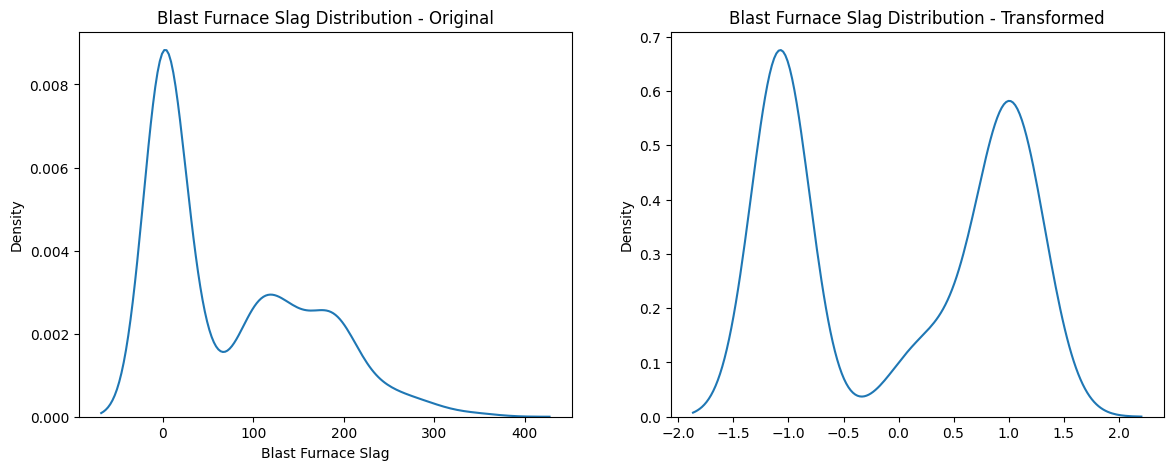

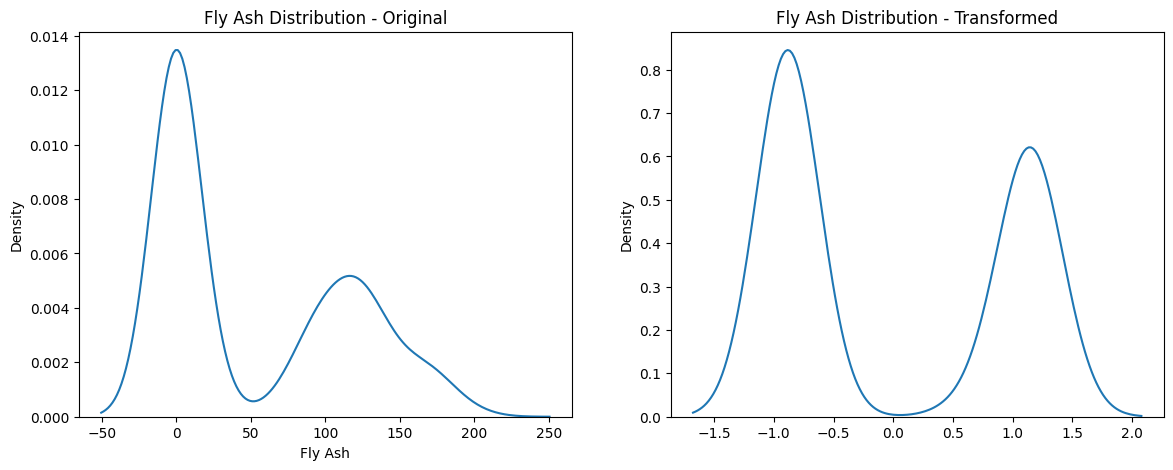

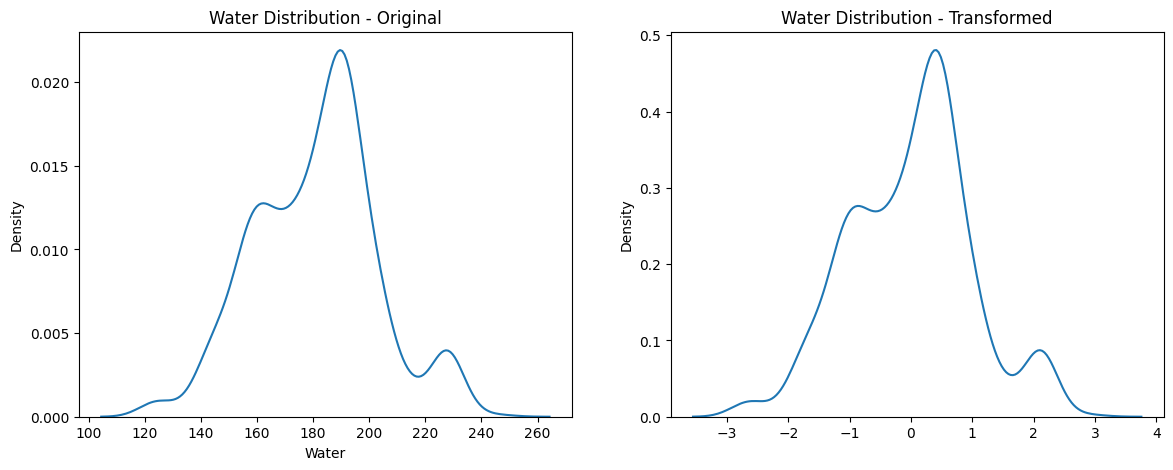

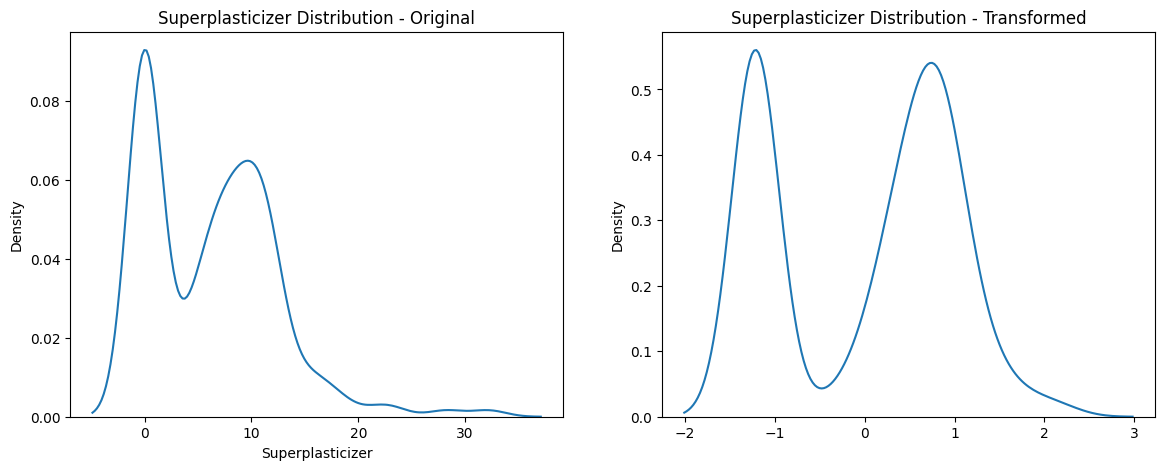

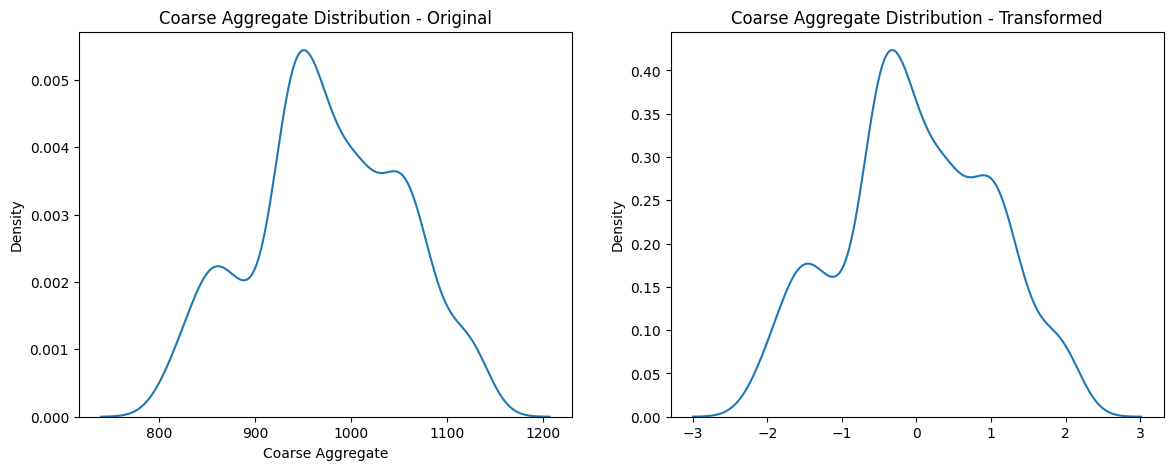

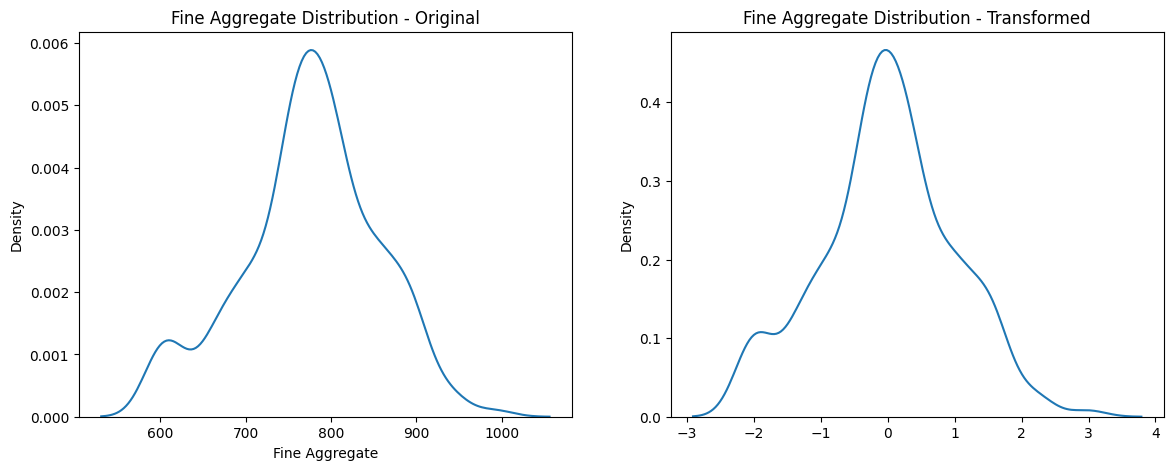

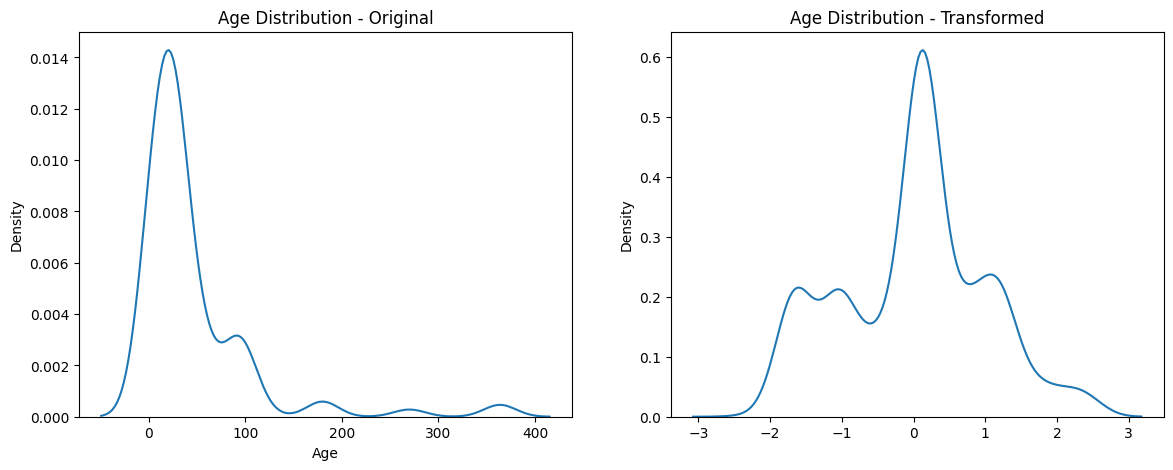

In [34]:
# before and after comaparision for box-cox plot

for i, col in enumerate(x_train.columns):
    plt.figure(figsize=(14, 5))
    plt.subplot(121)

    sns.kdeplot(x_train[col])
    plt.title(f'{col} Distribution - Original')

    plt.subplot(122)
    sns.kdeplot(x_train_trnf[:, i])
    plt.title(f'{col} Distribution - Transformed')
    plt.show()

In [35]:
# apply yeo-johnson transform

pt1 = PowerTransformer()

x_train_trnf1 = pt1.fit_transform(x_train)
x_test_trnf1 = pt1.transform(x_test)

lr = LinearRegression()
lr.fit(x_train_trnf1, y_train)

y_pred = lr.predict(x_test_trnf1)

print(r2_score(y_test, y_pred))

pd.DataFrame({'cols' : x_train.columns, 'Yeo-Johnson_lambdas' : pt1.lambdas_})

0.7659586870271846


,cols,Yeo-Johnson_lambdas
0,Cement,0.190015
1,Blast Furnace Slag,0.031295
2,Fly Ash,-0.166546
3,Water,0.886986
4,Superplasticizer,0.239519
5,Coarse Aggregate,1.234880
6,Fine Aggregate,1.766573
7,Age,-0.003614


In [40]:
# applying cross val score
np.mean(cross_val_score(lr, x_train_trnf1, y_train, scoring='r2', cv=10))

np.float64(0.8066922795279092)

In [41]:
x_train_trnf1 = pd.DataFrame(x_train_trnf1, columns=x_train.columns)
x_test_trnf1 = pd.DataFrame(x_test_trnf1, columns=x_train.columns)

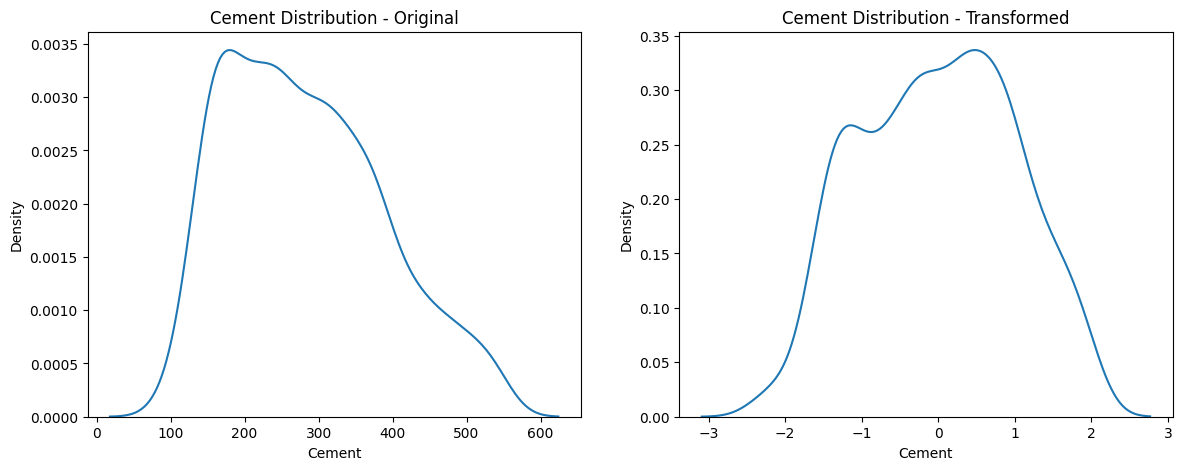

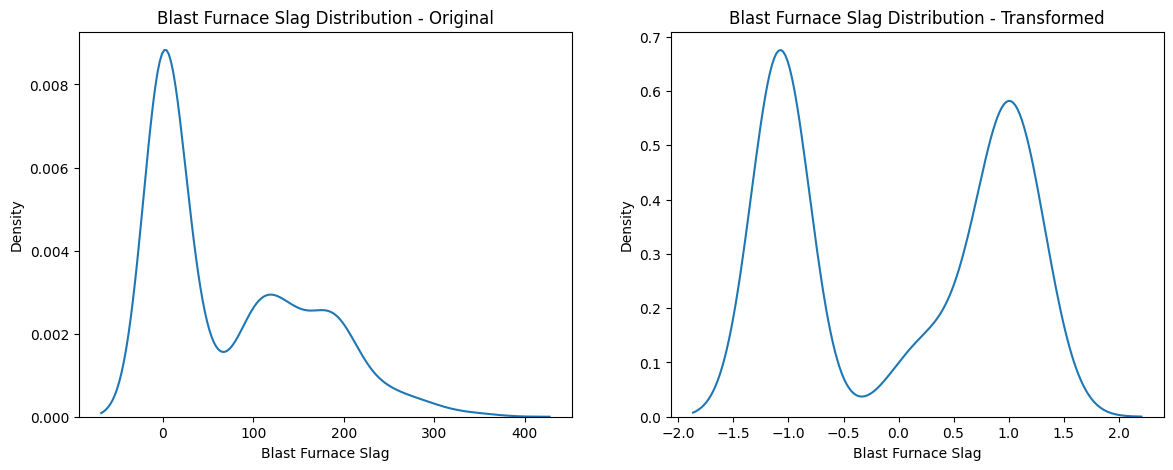

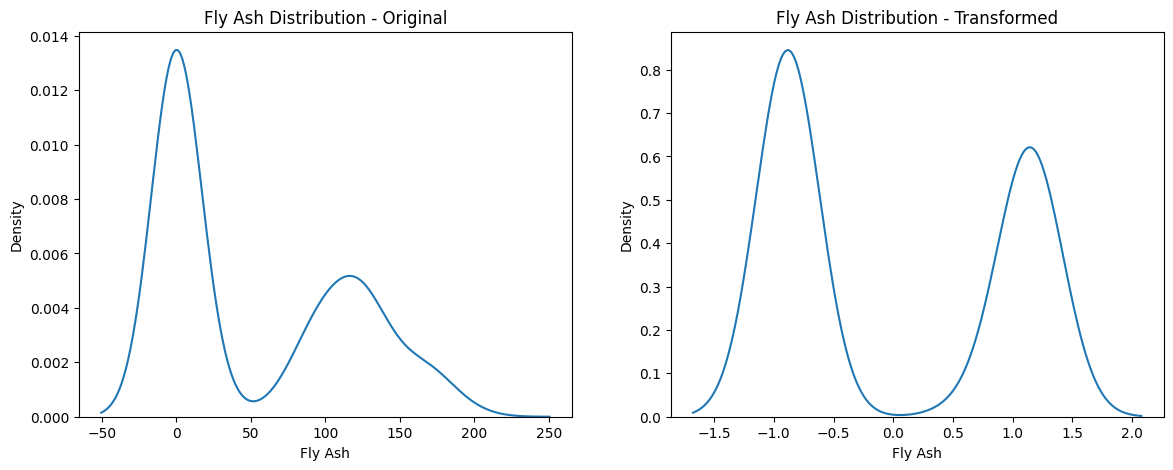

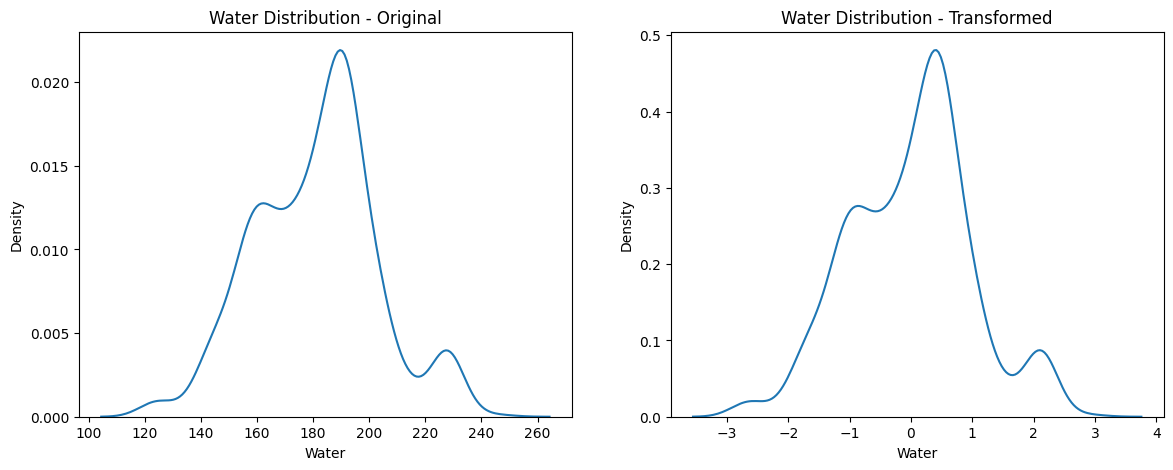

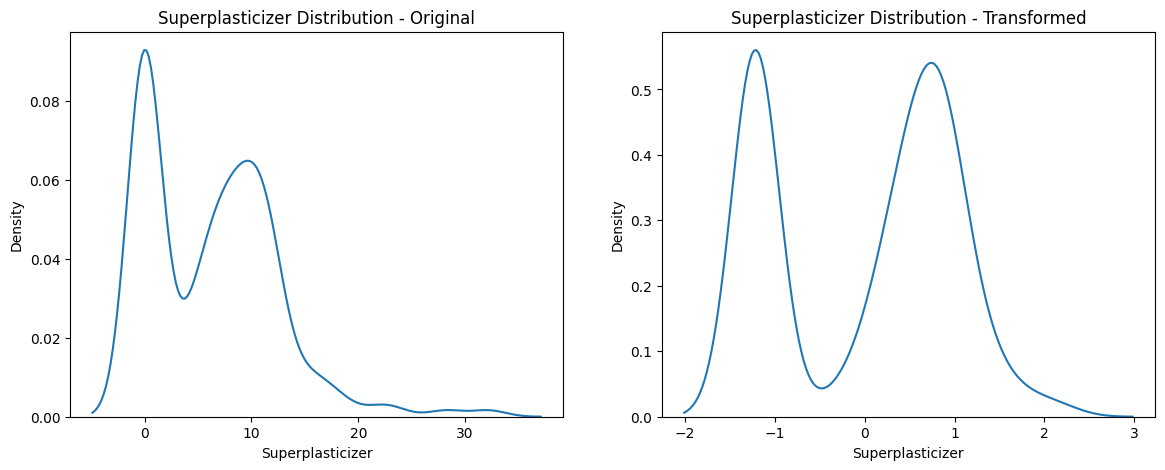

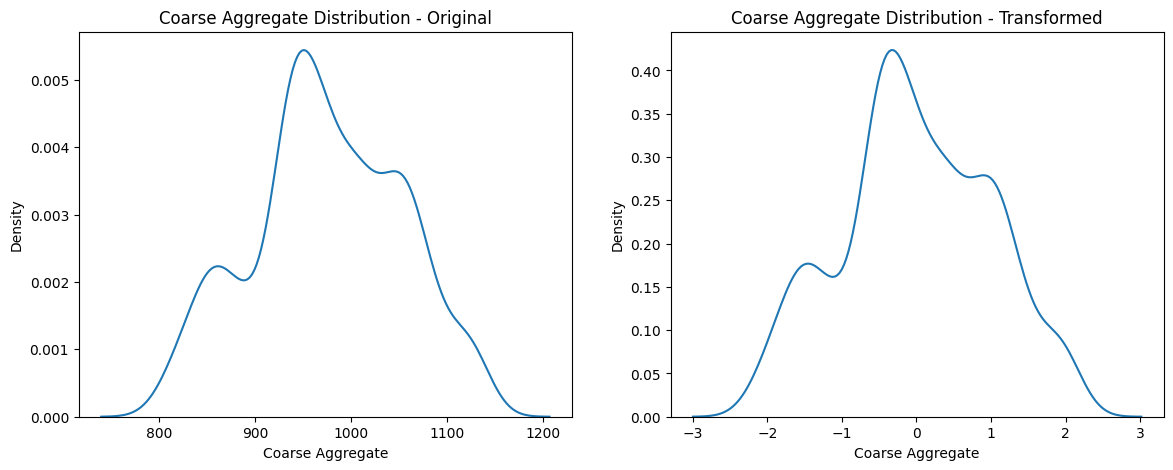

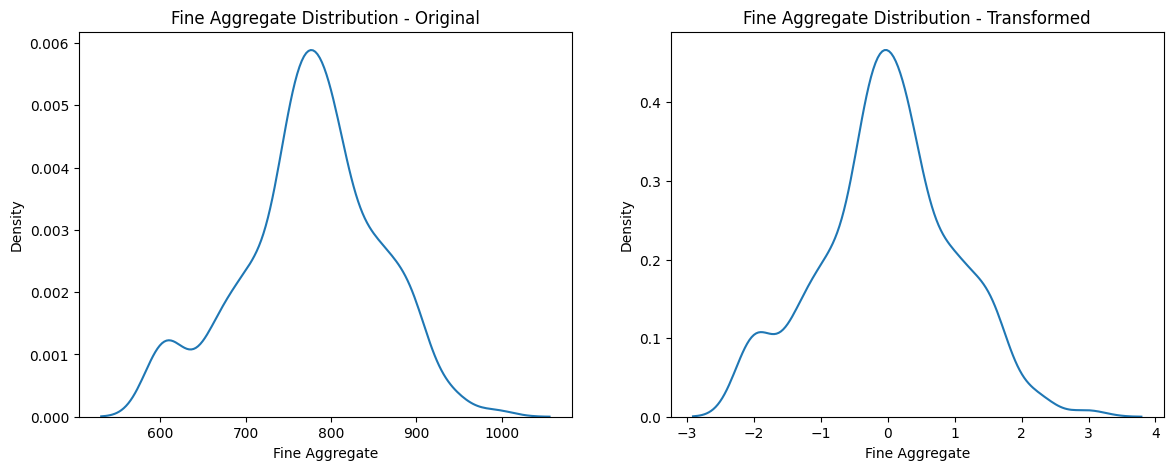

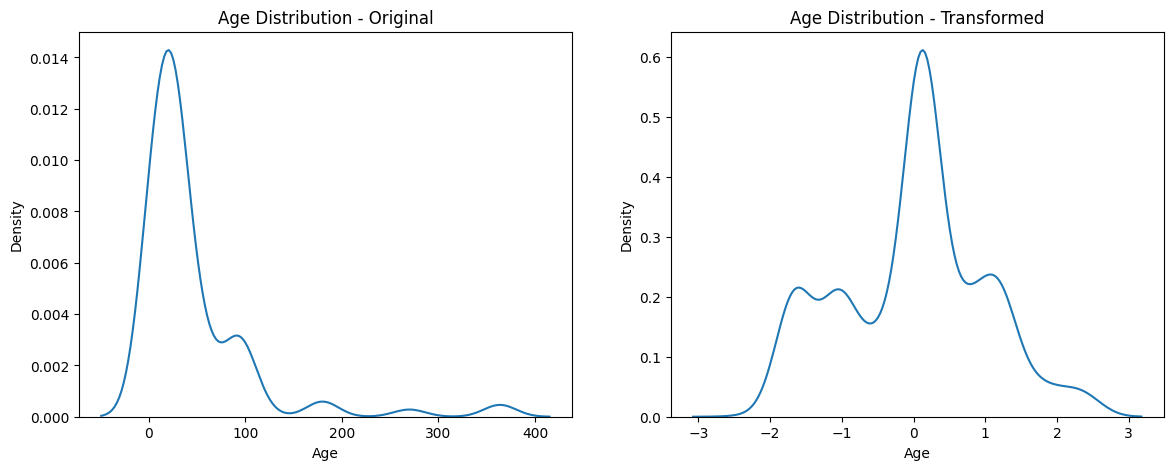

In [42]:
# before and after comparision for Yeo-Jhonson

for col in x_train_trnf1.columns:
  plt.figure(figsize=(14, 5))
  plt.subplot(121)

  sns.kdeplot(x_train[col])
  plt.title(f'{col} Distribution - Original')

  plt.subplot(122)
  sns.kdeplot(x_train_trnf1[col])
  plt.title(f'{col} Distribution - Transformed')
  plt.show()